In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from itertools import product
from statsmodels.graphics.mosaicplot import mosaic

In [52]:
df = pd.read_csv('C:\\Users\\KIIT\\Downloads\\EVIndia.csv')
df

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel,ListColumn,Ranges
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX,"['312', 'Km/Full', 'Charge']",312
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone,"['306', 'Km/Full', 'Charge']",306
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW,"['437', 'Km/Full', 'Charge']",437
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive,"['419', 'Km/Full', 'Charge']",419
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE,"['452', 'Km/Full', 'Charge']",452
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55,"['470', 'Km/Full', 'Charge']",470
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L,Quattro,na,"['388', 'Km/Full', 'Charge']",388
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na,"['415', 'Km/Full', 'Charge']",415
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 1 Cr,5 Seater,na,na,na,"['471', 'Km/Full', 'Charge']",471
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 1.16 Cr,5 Seater,na,na,na,"['425', 'Km/Full', 'Charge']",425


In [53]:
df.dtypes

Car             object
Style           object
Range           object
Transmission    object
VehicleType     object
PriceRange      object
Capacity        object
BootSpace       object
BaseModel       object
TopModel        object
ListColumn      object
Ranges          object
dtype: object

In [54]:
df.dropna(inplace = True)

In [55]:
df['ListColumn'] = df['Range'].str.split()

In [56]:
df['Ranges'] = df['ListColumn'].apply(lambda x: x[0])

In [57]:
df.head()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel,ListColumn,Ranges
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX,"[312, Km/Full, Charge]",312
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone,"[306, Km/Full, Charge]",306
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW,"[437, Km/Full, Charge]",437
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive,"[419, Km/Full, Charge]",419
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE,"[452, Km/Full, Charge]",452


In [58]:
print(df)

                      Car                  Style               Range  \
0           Tata Nexon EV            Compact SUV  312 Km/Full Charge   
1           Tata Tigor EV       Subcompact Sedan  306 Km/Full Charge   
2       Tata Nexon EV Max            Compact SUV  437 Km/Full Charge   
3                MG ZS EV            Compact SUV  419 Km/Full Charge   
4   Hyundai Kona Electric            Compact SUV  452 Km/Full Charge   
5           Jaguar I-Pace  Premium Midsize Sedan  470 Km/Full Charge   
6          Audi E-Tron GT          Premium Coupe  388 Km/Full Charge   
7                  BYD E6         Subcompact MPV  415 Km/Full Charge   
8       Mercedes-Benz EQC            Compact SUV  471 Km/Full Charge   
9                  BMW iX   Premium Fullsize SUV  425 Km/Full Charge   
10         Porsche Taycan   Premium Sports Sedan                  na   
11            Audi E-Tron            Compact SUV  400 Km/Full Charge   

   Transmission VehicleType         PriceRange   Capacity BootS

In [59]:
df.dtypes

Car             object
Style           object
Range           object
Transmission    object
VehicleType     object
PriceRange      object
Capacity        object
BootSpace       object
BaseModel       object
TopModel        object
ListColumn      object
Ranges          object
dtype: object

In [60]:
df.isnull().sum()

Car             0
Style           0
Range           0
Transmission    0
VehicleType     0
PriceRange      0
Capacity        0
BootSpace       0
BaseModel       0
TopModel        0
ListColumn      0
Ranges          0
dtype: int64

In [61]:
x = df.iloc[:,[5,10]].values
print(x)

[['₹ 13.99 - 17.4 L' list(['312', 'Km/Full', 'Charge'])]
 ['₹ 12.49 - 13.64 L' list(['306', 'Km/Full', 'Charge'])]
 ['₹ 17.74 - 19.24 L' list(['437', 'Km/Full', 'Charge'])]
 ['₹ 21.99 - 25.88 L' list(['419', 'Km/Full', 'Charge'])]
 ['₹ 23.79 - 23.98 L' list(['452', 'Km/Full', 'Charge'])]
 ['₹ 1.06 - 1.12 Cr' list(['470', 'Km/Full', 'Charge'])]
 ['₹ 1.8 Cr' list(['388', 'Km/Full', 'Charge'])]
 ['₹ 29.15 L' list(['415', 'Km/Full', 'Charge'])]
 ['₹ 1 Cr' list(['471', 'Km/Full', 'Charge'])]
 ['₹ 1.16 Cr' list(['425', 'Km/Full', 'Charge'])]
 ['₹ 1.5 Cr' list(['na'])]
 ['₹ 1.01 - 1.19 Cr' list(['400', 'Km/Full', 'Charge'])]]


In [62]:
df = df.drop('ListColumn', axis=1)

In [63]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(df[label]):
        lst = df[label].unique()
        label_map = {}
        for i in range(len(lst)):
            label_map[lst[i]] = i
        df[label] = df[label].map(label_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Car           12 non-null     int64
 1   Style         12 non-null     int64
 2   Range         12 non-null     int64
 3   Transmission  12 non-null     int64
 4   VehicleType   12 non-null     int64
 5   PriceRange    12 non-null     int64
 6   Capacity      12 non-null     int64
 7   BootSpace     12 non-null     int64
 8   BaseModel     12 non-null     int64
 9   TopModel      12 non-null     int64
 10  Ranges        12 non-null     int64
dtypes: int64(11)
memory usage: 1.2 KB


<Axes: >

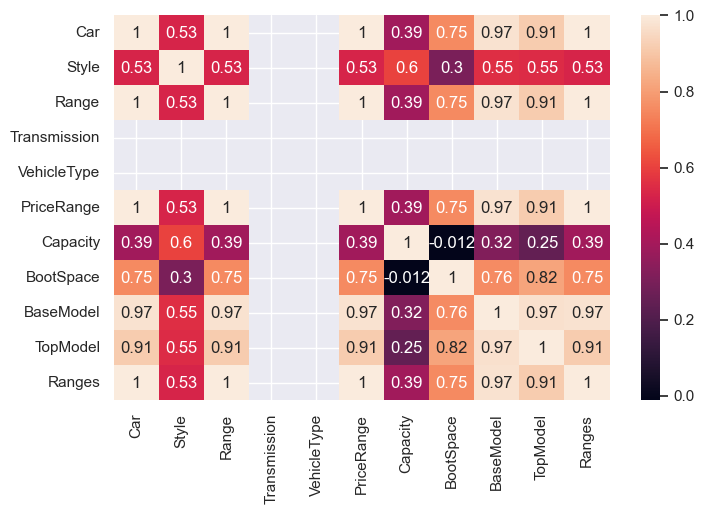

In [64]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)

In [67]:
df = df.drop('Transmission', axis=1)
df = df.drop('VehicleType', axis=1)
df = df.drop('Capacity', axis=1)

<Axes: >

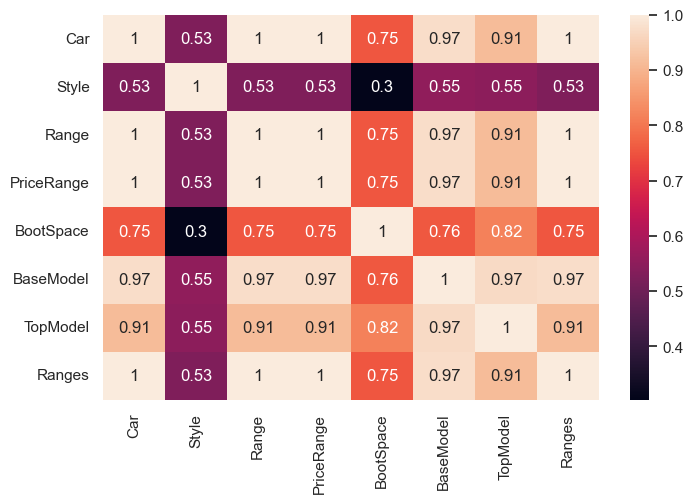

In [68]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)